## Wikidata.org

Wikidata.org allows you to get information from Wiki sites through an API.

Using the API requires you to write the query in [SPARQL](https://en.wikipedia.org/wiki/SPARQL), but there is plenty of example queries to work from at https://query.wikidata.org allowing you to get started without previous knowledge about this SPARQL.

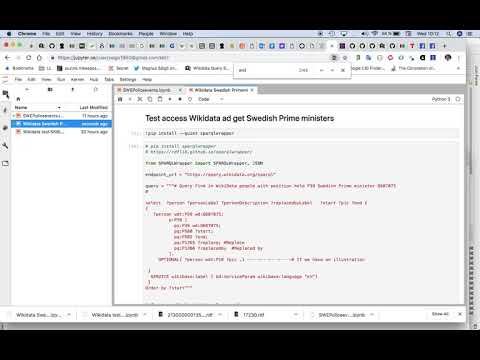

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("AR66WVBViBQ")

## Example: Swedish Prime ministers 

In [2]:
# Install a dependency using a terminal command
!pip install --quiet sparqlwrapper

# Allows us to use IPython.display.JSON
import IPython.display

In [3]:
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """# Query Find in WikiData people with position held P39 Swedish Prime minister Q687075
#

select  ?person ?personLabel ?personDescription ?replacedbyLabel   ?start ?pic ?end {
{
   ?person wdt:P39 wd:Q687075;
         p:P39 [
           ps:P39 wd:Q687075;
           pq:P580 ?start;
           pq:P582 ?end;
           pq:P1365 ?replace; #Replace
           pq:P1366 ?replacedby  #Replaced by
         ].
     OPTIONAL{ ?person wdt:P18 ?pic .} 					# If we have an illustration

 }   
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en"}
 }
Order by ?start"""


def get_results(endpoint_url, query):
    sparql = SPARQLWrapper(endpoint_url)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)
IPython.display.JSON(results)

<IPython.core.display.JSON object>

In [4]:
for result in results["results"]["bindings"]:
    print(result["personLabel"]["value"], result["start"]["value"], " - ",  result["end"]["value"])

Arvid Posse 1880-04-19T00:00:00Z  -  1883-06-13T00:00:00Z
Carl Johan Thyselius 1883-06-13T00:00:00Z  -  1884-05-16T00:00:00Z
Robert Themptander 1884-05-16T00:00:00Z  -  1888-02-06T00:00:00Z
Gillis Bildt 1888-02-06T00:00:00Z  -  1889-10-12T00:00:00Z
Gustaf Åkerhielm 1889-10-12T00:00:00Z  -  1891-07-10T00:00:00Z
Erik Gustaf Boström 1891-07-10T00:00:00Z  -  1900-09-12T00:00:00Z
Fredrik von Otter 1900-09-12T00:00:00Z  -  1902-07-05T00:00:00Z
Erik Gustaf Boström 1902-07-05T00:00:00Z  -  1905-04-13T00:00:00Z
Johan Ramstedt 1905-04-13T00:00:00Z  -  1905-08-02T00:00:00Z
Christian Lundeberg 1905-08-02T00:00:00Z  -  1905-11-07T00:00:00Z
Karl Staaff 1905-11-07T00:00:00Z  -  1906-05-29T00:00:00Z
Arvid Lindman 1906-05-29T00:00:00Z  -  1911-10-07T00:00:00Z
Karl Staaff 1911-10-07T00:00:00Z  -  1914-02-17T00:00:00Z
Hjalmar Hammarskjöld 1914-02-17T00:00:00Z  -  1917-03-30T00:00:00Z
Carl Swartz 1917-03-30T00:00:00Z  -  1917-10-19T00:00:00Z
Nils Edén 1917-10-19T00:00:00Z  -  1920-03-10T00:00:00Z
Hjalmar 

## Example: Airports near Berlin

In [5]:
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?place ?placeLabel ?location
WHERE
{
  # Berlin coordinates
  wd:Q64 wdt:P625 ?berlinLoc .
  SERVICE wikibase:around {
    ?place wdt:P625 ?location .
    bd:serviceParam wikibase:center ?berlinLoc .
    bd:serviceParam wikibase:radius "100" .
  } .
  # Is an airport
  FILTER EXISTS { ?place wdt:P31/wdt:P279* wd:Q1248784 } .
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" .
  } 
}"""


def get_results(endpoint_url, query):
    sparql = SPARQLWrapper(endpoint_url)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)
IPython.display.JSON(results)

<IPython.core.display.JSON object>

In [6]:
for result in results["results"]["bindings"]:
    print(result["placeLabel"]["value"])

Berlin Tempelhof Airport
Berlin Schönefeld Airport
Berlin Tegel Airport
Dedelow Airport
Nauen Airport
Segeletz Airport
Lusse Airport
Eisenhuttenstadt Airport
Eisenhuttenstadt Airport
Kyritz Airport
Berlin Brandenburg Airport
Johannisthal Air Field
Kunice
Chojna
